In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as sts
import matplotlib as mpl 
import seaborn as sns
from sklearn.decomposition import PCA # Principal Component Analysis module
%matplotlib inline

In [2]:
#For QQ Plot
import scipy.stats as sts

#Correlation p-values
from scipy.stats.stats import pearsonr

#Regression output
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [3]:
path = "C:/Users/Administrator/Documents/Master/MSIS-5223-70250 - Programming for Data Sci - 8282017 - 159 PM/Data for Tutorials and ICE/Data"
os.chdir(path)
df = pd.read_table('reduction_data_new.txt', sep= '\t')

In [4]:
df

,time,peruse01,peruse02,peruse03,peruse04,peruse05,peruse06,pereou01,pereou02,pereou03,...,state,military,militbranch,familystruct,children,income,employ,color,eatout,religion
0,14,7,7,7,7,7,7,7,7,7,...,3.0,2.0,NaN,5.0,NaN,4.0,15.0,4.0,5.0,10.0
1,14,6,5,5,6,6,6,6,6,6,...,35.0,2.0,NaN,4.0,4.0,2.0,16.0,1.0,3.0,10.0
2,10,5,5,5,6,5,6,3,5,4,...,3.0,2.0,NaN,1.0,NaN,2.0,13.0,8.0,6.0,10.0
3,13,5,5,5,5,5,6,6,5,5,...,3.0,2.0,NaN,1.0,NaN,1.0,5.0,4.0,5.0,10.0
4,4,7,6,6,6,7,6,6,6,7,...,NaN,2.0,NaN,1.0,NaN,1.0,6.0,7.0,4.0,6.0
5,5,6,6,7,6,7,6,6,6,6,...,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,6,6,7,6,7,7,7,6,...,NaN,2.0,NaN,1.0,NaN,1.0,NaN,8.0,5.0,18.0
7,7,6,6,6,5,5,5,7,7,7,...,3.0,2.0,NaN,1.0,NaN,1.0,21.0,4.0,5.0,1.0
8,5,5,4,5,5,5,4,5,4,5,...,NaN,2.0,NaN,1.0,NaN,1.0,NaN,4.0,4.0,NaN
9,12,6,6,6,5,5,6,5,5,5,...,NaN,2.0,NaN,1.0,NaN,1.0,14.0,1.0,4.0,28.0


In [6]:
#Drop Null data
df.dropna(axis = 1, how = 'any')

,time,peruse01,peruse02,peruse03,peruse04,peruse05,peruse06,pereou01,pereou02,pereou03,...,intent02,intent03,operatingsys,race_white,race_black,race_hisp,race_asian,race_native,race_pacif,race_other
0,14,7,7,7,7,7,7,7,7,7,...,7,7,1,0,0,0,0,1,0,0
1,14,6,5,5,6,6,6,6,6,6,...,7,7,1,0,0,0,0,1,0,0
2,10,5,5,5,6,5,6,3,5,4,...,5,4,1,0,0,0,1,0,0,0
3,13,5,5,5,5,5,6,6,5,5,...,5,5,5,0,0,0,1,0,0,0
4,4,7,6,6,6,7,6,6,6,7,...,6,6,1,0,0,0,1,0,0,0
5,5,6,6,7,6,7,6,6,6,6,...,6,7,1,0,0,0,1,0,0,0
6,6,6,6,6,7,6,7,7,7,6,...,6,6,1,0,0,0,1,0,0,0
7,7,6,6,6,5,5,5,7,7,7,...,6,6,5,0,0,0,1,0,0,0
8,5,5,4,5,5,5,4,5,4,5,...,5,5,1,0,0,0,1,0,0,0
9,12,6,6,6,5,5,6,5,5,5,...,7,4,5,0,0,0,1,0,0,0


In [10]:
# Explore data
df.dtypes
df.describe()

,time,peruse01,peruse02,peruse03,peruse04,peruse05,peruse06,pereou01,pereou02,pereou03,...,state,military,militbranch,familystruct,children,income,employ,color,eatout,religion
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,143.000000,165.000000,4.0,165.000000,4.000000,160.000000,130.000000,163.000000,163.000000,159.000000
mean,12.678571,5.720238,5.511905,5.619048,5.464286,5.505952,5.684524,6.011905,5.755952,5.779762,...,13.902098,1.975758,3.0,1.406061,2.000000,1.756250,14.276923,3.411043,4.779141,10.396226
std,7.666180,1.020306,0.966431,0.971507,1.037575,1.152955,1.050463,0.953959,1.046792,0.898606,...,16.029601,0.154269,0.0,1.035333,1.414214,1.779502,8.505370,2.557318,1.149474,4.477820
min,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,1.000000,1.000000,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,3.000000,2.000000,3.0,1.000000,1.000000,1.000000,7.000000,1.000000,4.000000,10.000000
50%,11.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,3.000000,2.000000,3.0,1.000000,1.500000,1.000000,14.000000,3.000000,5.000000,10.000000
75%,14.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,...,24.000000,2.000000,3.0,1.000000,2.500000,1.000000,23.000000,5.000000,5.000000,10.000000
max,56.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,45.000000,2.000000,3.0,5.000000,4.000000,9.000000,34.000000,9.000000,7.000000,28.000000


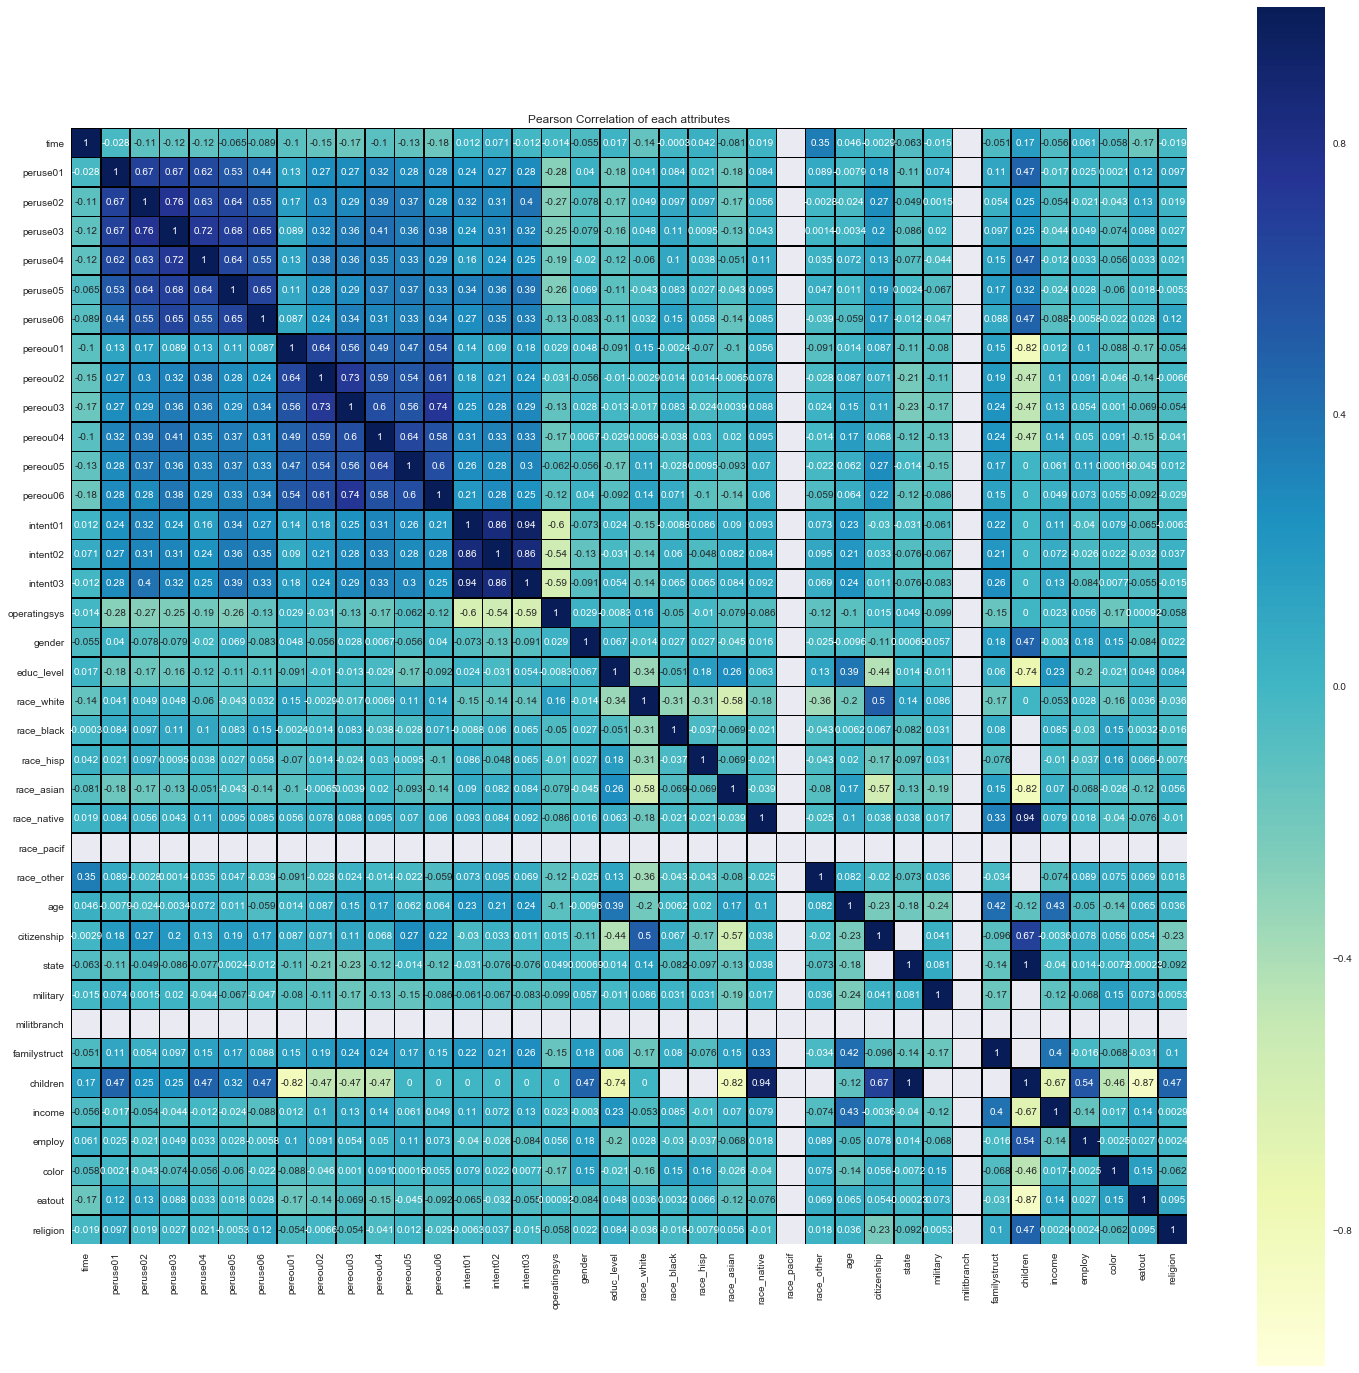

In [12]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation of each attributes')
# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [13]:
df.columns

Index(['time', 'peruse01', 'peruse02', 'peruse03', 'peruse04', 'peruse05',
       'peruse06', 'pereou01', 'pereou02', 'pereou03', 'pereou04', 'pereou05',
       'pereou06', 'intent01', 'intent02', 'intent03', 'operatingsys',
       'gender', 'educ_level', 'race_white', 'race_black', 'race_hisp',
       'race_asian', 'race_native', 'race_pacif', 'race_other', 'age',
       'citizenship', 'state', 'military', 'militbranch', 'familystruct',
       'children', 'income', 'employ', 'color', 'eatout', 'religion'],
      dtype='object')

#Scatter target variable to each independence variables

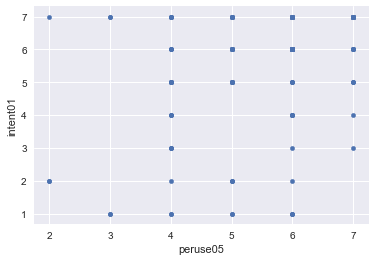

In [14]:
df.plot.scatter(x='peruse05', y='intent01')

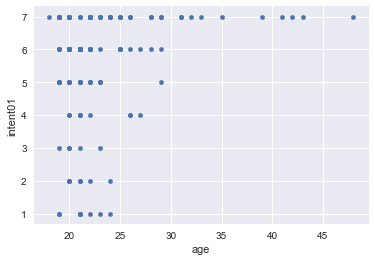

In [15]:
df.plot.scatter(x='age', y='intent01')

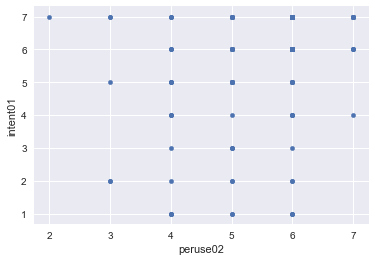

In [16]:
df.plot.scatter(x='peruse02', y='intent01')

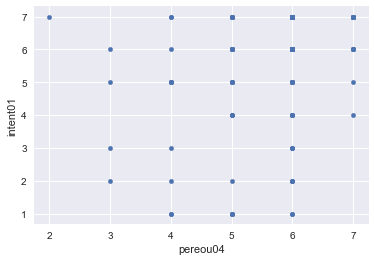

In [17]:
df.plot.scatter(x='pereou04', y='intent01')

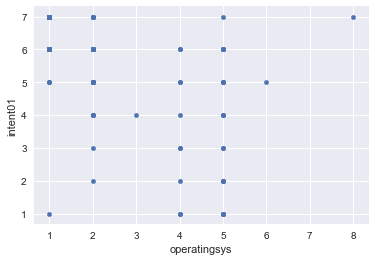

In [18]:
df.plot.scatter(x='operatingsys', y='intent01')

In [31]:
dfnew = df[['intent01','peruse05','peruse02','pereou04','operatingsys','age']]

In [32]:
#Collinearity
dfnew.corr()

,intent01,peruse05,peruse02,pereou04,operatingsys,age
intent01,1.000000,0.340873,0.323890,0.308517,-0.597892,0.231243
peruse05,0.340873,1.000000,0.642133,0.365810,-0.256058,0.011199
peruse02,0.323890,0.642133,1.000000,0.386221,-0.267895,-0.023765
pereou04,0.308517,0.365810,0.386221,1.000000,-0.171806,0.169316
operatingsys,-0.597892,-0.256058,-0.267895,-0.171806,1.000000,-0.101698
age,0.231243,0.011199,-0.023765,0.169316,-0.101698,1.000000


In [21]:
dfnew1 = df[['peruse05','peruse02','pereou04','operatingsys','age','intent01']]

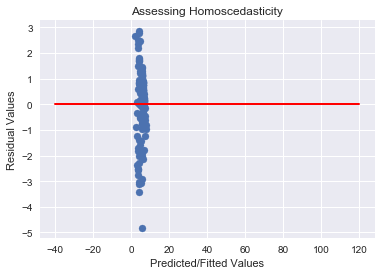

In [25]:
#Homoscedasticity
#===============================================
# This code is simpler and provides everything
# in the output. This also includes the 
# Durbin-Watson Test for Independence.
# Does not have VIF calculations!
#===============================================

linreg2 = smf.ols('intent01 ~ peruse05 + peruse02 + pereou04 + operatingsys + age', df).fit()

#Assess homoscedasticity
plt.scatter(linreg2.fittedvalues, linreg2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([-40, 120],[0, 0], 'red', lw=2)   #Add horizontal line
plt.show()


#the figure is evenly distributed across the x-asis, and there is one residual values is outlier

In [23]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               intent01   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     25.24
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           1.11e-18
Time:                        22:10:28   Log-Likelihood:                -272.95
No. Observations:                 165   AIC:                             557.9
Df Residuals:                     159   BIC:                             576.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5299      0.935      2.706      0.008       0.683       4.376
peruse05         0.1801      0.116      1.551      0.123      -0.049       0.409
peruse02         0.1255      0.140      0.894      0.373      -0.152       0.403
pereou04         0.2193      0.119      1.846      0.067      -0.015       0.454
operatingsys    -0.5315      0.066     -8.067      0.000      -0.662      -0.401
age              0.0583      0.022      2.629      0.009       0.014       0.102
==============================================================================
Omnibus:                       19.577   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.259
Skew:                          -0.732   Prob(JB):                     3.27e-06
Kurtosis:                       4.238   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

((array([-2.63619469, -2.31985126, -2.13890476, -2.00899334, -1.90613804,
         -1.82021181, -1.74594095, -1.68021408, -1.62103502, -1.56704323,
         -1.51726796, -1.47099118, -1.4276662 , -1.38686669, -1.34825346,
         -1.31155201, -1.2765369 , -1.24302058, -1.21084528, -1.17987694,
         -1.15000061, -1.12111696, -1.09313954, -1.06599258, -1.0396093 ,
         -1.01393051, -0.98890348, -0.96448101, -0.94062067, -0.91728419,
         -0.89443686, -0.87204715, -0.85008629, -0.82852795, -0.80734798,
         -0.78652413, -0.76603589, -0.74586428, -0.7259917 , -0.70640177,
         -0.68707927, -0.66800996, -0.64918054, -0.63057852, -0.61219219,
         -0.59401054, -0.57602317, -0.55822027, -0.54059257, -0.52313129,
         -0.50582807, -0.48867499, -0.47166452, -0.45478944, -0.4380429 ,
         -0.42141832, -0.40490941, -0.38851013, -0.37221468, -0.35601748,
         -0.33991315, -0.32389651, -0.30796253, -0.29210636, -0.2763233 ,
         -0.26060878, -0.24495836, -0.

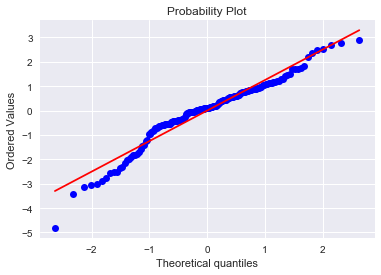

In [27]:
sts.probplot(linreg2.resid, dist="norm", plot=plt)

In [55]:
pearsonr(df.intent01,df.operatingsys)

(-0.5978921715528297, 1.1613124760576334e-17)

In [28]:
#################################################
#==============Regression Analysis==============#
# Create the regression equations to be used to	#
# obtain the VIF for the models. Also, you can 	#
# obtain the predicted values and residuals 	#
# from the regression model to assess constant 	#
# variance.							            #
#################################################

linreg1 = LinearRegression(fit_intercept=True, normalize=True)
linreg1.fit(dfnew1[['peruse05','peruse02','pereou04','operatingsys','age']],dfnew1.intent01)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').